# Importing Packages and Datasets

In [1]:
import pandas as pd
import numpy as np

In [2]:
stockSymbol = "BPI"

In [3]:
Prices = pd.read_csv(stockSymbol + ".csv")

In [4]:
news_df = pd.read_csv("complete_dates_all_news.csv")

In [5]:
Stock_df = news_df[news_df['stock'] == stockSymbol].reset_index().drop(columns='index')

In [6]:
Stock_df[Stock_df.Date.isnull()]

,Date,Source,Body,Link,Title,stock


# Text Preprocessing

In [7]:
import pandas as pd
import numpy as np

#import contractions
import string

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

import pysentiment2 as ps
lm = ps.LM()
hiv4 = ps.HIV4()

[nltk_data] Downloading package punkt to /Users/shawn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/shawn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
def to_lowercase(text):
  text = text.lower()
  return text

def fix_contractions(text):
  text = contractions.fix(text)
  return text

    
def lm_tokenize(text,
                    keep_punct = False,
                    keep_alnum = False,
                    keep_stop = False):
  
  token_list = lm.tokenize(text)

  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation]

  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()]
  
  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]

  return token_list

########################################################################

def lm_preprocess_text(text):
    
    text = to_lowercase(text) # lower case
    #text = fix_contractions(text) # replace contractions
    
    tokens = lm_tokenize(text, keep_punct = False,
                    keep_alnum = False,
                    keep_stop = False)
        
    return tokens

# Getting Sentiment Scores using Harvard IV dictionary

In [9]:
#harvard IV dictionary
# def get_hiv4_score(DF1): #edit ['Bodies'] if diff col_name
#     DF1['hiv4_tokens'] = DF1.apply(lambda row: hiv4_preprocess_text(row['Body']),axis=1)
#     DF1['hiv4_score'] = [hiv4.get_score(x) for x in DF1['hiv4_tokens']]
    
#     # Iterate through the headlines and get the polarity scores
#     hiv4_scores = DF1['hiv4_score'].tolist()
    
#     # Convert the 'scores' list of dicts into a DataFrame
#     hiv4_scores_df = pd.DataFrame(hiv4_scores)
    
#     # Join the DataFrames of the news and the list of dicts
#     DF1 = DF1.join(hiv4_scores_df, rsuffix='_hiv4')
    
#     #removing unnecessary columns 
#     DF1 = DF1.drop(columns=['Positive', 'Negative','hiv4_score','Subjectivity', 'hiv4_tokens'])
    
#     return DF1

In [10]:
#LM dictionary
def get_lm_score(DF1): #edit ['Bodies'] if diff col_name
    #consolidated['tokens'] = [lm.tokenize(x) for x in consolidated['Title']]
    DF1['lm_tokens'] = DF1.apply(lambda row: lm_preprocess_text(row['Body']),axis=1)
    DF1['lm_score'] = [lm.get_score(x) for x in DF1['lm_tokens']]

    # Iterate through the headlines and get the polarity scores
    lm_scores = DF1['lm_score'].tolist()

    # Convert the 'scores' list of dicts into a DataFrame
    lm_scores_df = pd.DataFrame(lm_scores)

    # Join the DataFrames of the news and the list of dicts
    DF1 = DF1.join(lm_scores_df, rsuffix='_right')
    
    #removing unnecessary columns 
    DF1 = DF1.drop(columns=['Positive', 'Negative','Subjectivity'])
    
    return DF1

In [11]:
get_lm_score(Stock_df)

,Date,Source,Body,Link,Title,stock,lm_tokens,lm_score,Polarity
0,4/28/21,colfinancial,$BPI earnings down 22% due to one-off tax expe...,NaN,$BPI earnings down 22% due to one-off tax expe...,BPI,"[bpi, earn, due, tax, expens, line, estim, ful...","{'Positive': 0, 'Negative': 0, 'Polarity': 0.0...",0.000000
1,4/23/21,colfinancial,Other News: - $BPI is interested on bidding f...,NaN,Other News: - $BPI is interested on bidding f...,BPI,"[news, bpi, interest, bid, ph, consum]","{'Positive': 0, 'Negative': 0, 'Polarity': 0.0...",0.000000
2,4/23/21,colfinancial,Top Stories: - $BPI: Earnings slightly underp...,NaN,Top Stories: - $BPI: Earnings slightly underp...,BPI,"[top, bpi, earn, slightli, underperform, highe...","{'Positive': 0, 'Negative': 2, 'Polarity': -0....",-1.000000
3,4/14/21,colfinancial,$BPI: Recovery to pre-pandemic levels not seen...,NaN,$BPI: Recovery to pre-pandemic levels not seen...,BPI,"[bpi, recoveri, pre, pandem, level, seen, full...","{'Positive': 0, 'Negative': 0, 'Polarity': 0.0...",0.000000
4,4/14/21,colfinancial,Top Story: - $BPI: Recovery to pre-pandemic l...,NaN,Top Story: - $BPI: Recovery to pre-pandemic l...,BPI,"[top, bpi, recoveri, pre, pandem, level, seen,...","{'Positive': 0, 'Negative': 0, 'Polarity': 0.0...",0.000000
...,...,...,...,...,...,...,...,...,...
408,4/22/21,Manila Bulletin,Bank of the Philippine Islands posted a 21.7 p...,https://mb.com.ph/2021/04/22/bpi-net-income-sh...,BPI net income shrinks 22% to P5 billion in fi...,BPI,"[percent, drop, net, incom, p, pre, tax, incom...","{'Positive': 2, 'Negative': 6, 'Polarity': -0....",-0.500000
409,3/26/21,Manila Bulletin,"BPI Family Savings Bank (BFSB), the consumer a...",https://mb.com.ph/2021/03/26/bpi-family-saving...,BPI Family Savings Bank gets triple-A rating,BPI,"[bpi, famili, save, bfsb, consum, retail, arm,...","{'Positive': 11, 'Negative': 5, 'Polarity': 0....",0.375000
410,10/11/20,Manila Bulletin,"Bank of Philippines Islands (BPI), the country...",https://mb.com.ph/2020/10/11/online-payment-is...,"Online payment is becoming a necessity, says BPI",BPI,"[bpi, lead, commerci, said, busi, need, digit,...","{'Positive': 21, 'Negative': 4, 'Polarity': 0....",0.680000
411,1/29/21,Manila Bulletin,Bank of the Philippine Islands posted a 25.7 p...,https://mb.com.ph/2021/01/29/bpi-posts-26-prof...,BPI posts 26% profit drop on higher provisions,BPI,"[percent, drop, net, incom, p, p, earn, due, h...","{'Positive': 2, 'Negative': 7, 'Polarity': -0....",-0.555555


## Get Date from col Date_time

In [12]:
from datetime import datetime

def to_date(DataFrame):
    #DataFrame['Date'] = [datetime.strptime(x, '%B %d, %Y %I:%M:%S %p').strftime('%m/%d/%y') for x in DataFrame['Date_Time']]
    DataFrame['Date'] = pd.to_datetime(DataFrame['Date'])

## changing weekend dates to following mondays

In [13]:
from datetime import datetime, timedelta

def wkend_to_monday(input_date_col):
    no_wkend = []
    for d in input_date_col:
        weekno = d.weekday()
        if weekno == 5: #saturday + 2 days
            no_wkend.append(d + timedelta(days = 2))
        elif weekno == 6: #saturday + 1 day
            no_wkend.append(d + timedelta(days = 1))
        else:
            no_wkend.append(d)

    input_date_col = pd.to_datetime(no_wkend)

## date reduction with polarity aggregations

In [14]:
#Date Reduction
#Creating new_df with single dates
#code->  GLO_mean_score = pd.DataFrame(GLO_score['Date'].unique(), columns=['Date'])

In [15]:
#Mean of Scores
#DataFrame = new_df with single dates
def get_mean_SS(DataFrame, DF2): #edit ['Date'] and/or ['Polarity'] if diff col_name
    mean_score = []
    for sd in DF2['Date']:
        mean_score.append(DataFrame[DataFrame['Date'] == sd]['Polarity'].mean())

    DF2['Mean_Score'] = mean_score

In [16]:
#Percentage of Positive News Sentiment
#DataFrame = new_df with single dates
def get_percent_pos_SS(DataFrame, DF2): #edit ['Date'] and/or ['Polarity'] if diff col_name
    percent_pos_sent = []
    for sd in DF2['Date']:
        date_data = DataFrame[DataFrame['Date'] == sd]
        num_pos = len(date_data[date_data['Polarity'] > 0]) #sentiment score  >0   or   >=0
        percent_pos_sent.append(num_pos/len(date_data))

    DF2['Percent_of_PosSent'] = percent_pos_sent

## Daily Stock Price Change

In [17]:
#Daily Stock Price Change
def day_price_change(df_histprice):
    df_histprice['Price_Change'] = (df_histprice[' Close']-df_histprice[' Open'])/df_histprice[' Open']

# Combining Prices with Sentiment Score

In [18]:
#equate with output_df
def combine_prices_SS(df_histprice, df_SS):
    df_histprice['Date'] = pd.to_datetime(df_histprice['Date'])
    df_histprice = df_histprice.sort_values(by=['Date']).reset_index(drop=True)
    output_df = df_histprice.merge(df_SS, how='left', on = 'Date').ffill().bfill()

    return output_df

---

In [19]:
def df_for_plot(DataFrame, df_histprice):
    
    #Process with Article_df
    DataFrame = get_lm_score(DataFrame)
    
    to_date(DataFrame)

    #wkend_to_monday(input_date_col)
    wkend_to_monday(DataFrame['Date'])

    #Creating new_df with single dates
    DF2 = pd.DataFrame(DataFrame['Date'].unique(), columns=['Date'])

    get_mean_SS(DataFrame, DF2)

    get_percent_pos_SS(DataFrame, DF2)

    #########################################
    #Process with Price_df
    day_price_change(df_histprice)

    ##########################################
    #Combining Prices with Sentiment Scores
    #combine_prices_SS(df_histprice, df_SS, output_df)
    output_df = combine_prices_SS(df_histprice, DF2)
    
    return output_df

In [20]:
forplot = df_for_plot(Stock_df, Prices)
forplot = forplot.sort_values(by=['Date']).reset_index(drop=True)

In [21]:
forplot

,Date,Open,High,Low,Close,Volume,Price_Change,Mean_Score,Percent_of_PosSent
0,2019-01-02,94.00,94.50,92.55,94.00,921050,0.000000,-0.5,0.0
1,2019-01-03,94.00,95.00,92.50,95.00,1956650,0.010638,-0.5,0.0
2,2019-01-04,94.55,95.05,93.50,93.50,2918340,-0.011105,-0.5,0.0
3,2019-01-07,94.00,95.70,93.00,93.00,2523390,-0.010638,-0.5,0.0
4,2019-01-08,94.70,94.70,91.80,91.80,1463860,-0.030623,-0.5,0.0
...,...,...,...,...,...,...,...,...,...
617,2021-07-16,85.00,86.70,85.00,86.50,1780990,0.017647,0.0,0.0
618,2021-07-19,86.65,86.65,84.20,86.05,1326210,-0.006924,0.0,0.0
619,2021-07-21,86.20,86.50,84.30,84.30,928280,-0.022042,0.0,0.0
620,2021-07-22,84.55,87.50,84.55,87.50,948370,0.034891,0.0,0.0


In [22]:
forplot.corr()

,Open,High,Low,Close,Volume,Price_Change,Mean_Score,Percent_of_PosSent
Open,1.000000,0.994278,0.994297,0.988319,0.003064,-0.052066,-0.066944,-0.035407
High,0.994278,1.000000,0.992626,0.995052,0.023344,0.029711,-0.074868,-0.043458
Low,0.994297,0.992626,1.000000,0.993716,-0.018691,0.019503,-0.063880,-0.032093
Close,0.988319,0.995052,0.993716,1.000000,-0.006249,0.099203,-0.070364,-0.034657
Volume,0.003064,0.023344,-0.018691,-0.006249,1.000000,-0.046924,0.047676,0.085579
Price_Change,-0.052066,0.029711,0.019503,0.099203,-0.046924,1.000000,-0.020964,0.001771
Mean_Score,-0.066944,-0.074868,-0.063880,-0.070364,0.047676,-0.020964,1.000000,0.807156
Percent_of_PosSent,-0.035407,-0.043458,-0.032093,-0.034657,0.085579,0.001771,0.807156,1.000000


In [23]:
to_roll_list = [' Close', 'Price_Change','Mean_Score', 'Percent_of_PosSent']
roll_col = ['Close_roll', 'Price_Change_roll', 'Mean_Score_roll', 'Percent_of_PosSent_roll']

for i in range(len(to_roll_list)):
    forplot[roll_col[i]] = forplot[to_roll_list[i]].rolling(5, min_periods=1).mean()

In [24]:
forplot.columns

Index(['Date', ' Open', ' High', ' Low', ' Close', ' Volume', 'Price_Change',
       'Mean_Score', 'Percent_of_PosSent', 'Close_roll', 'Price_Change_roll',
       'Mean_Score_roll', 'Percent_of_PosSent_roll'],
      dtype='object')

---

# Time Series Plotting

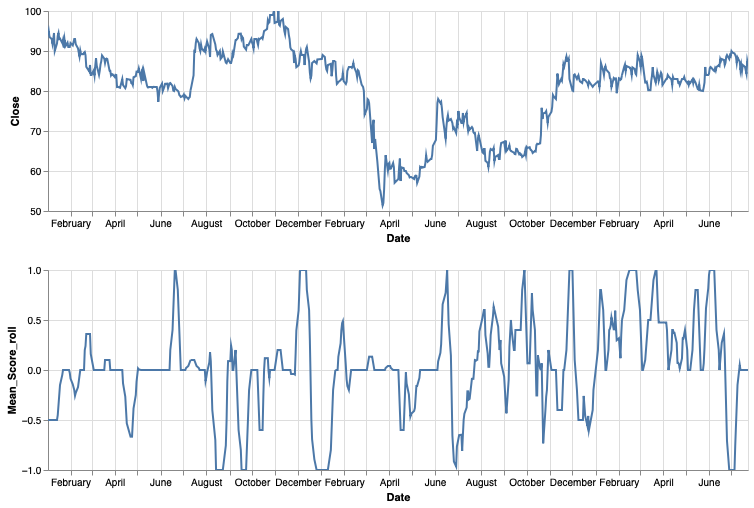

In [25]:
import altair as alt
alt.renderers.enable('notebook')

alt.Chart(forplot).mark_line().encode(
    alt.X(alt.repeat("column"), type='temporal'),
    alt.Y(alt.repeat("row"), type='quantitative', scale=alt.Scale(zero = False))
).properties(
    width=700,
    height=200
).repeat(
    row=[' Close', 'Mean_Score_roll'],
    column=['Date']
).interactive(
  bind_y = False
)

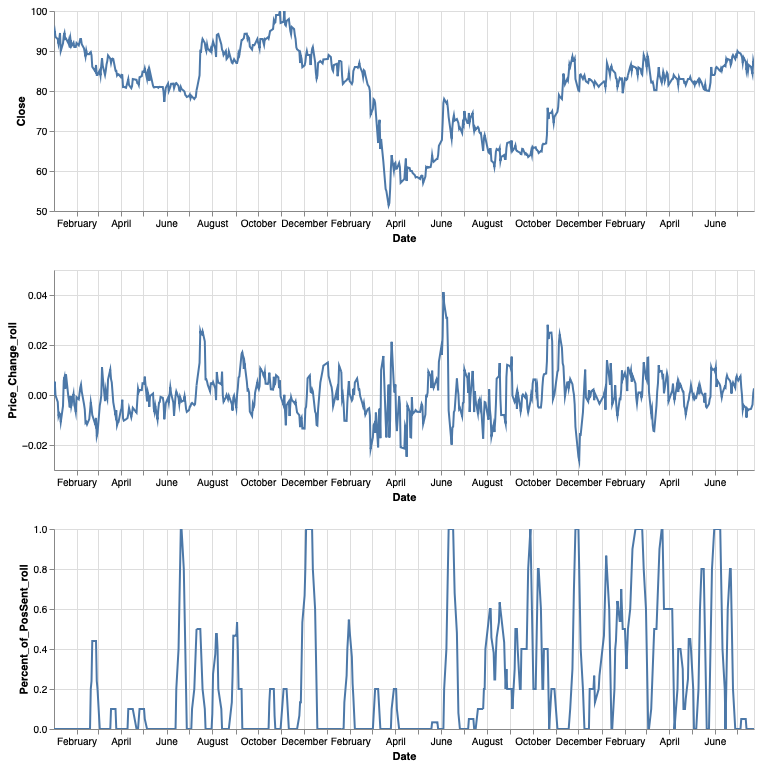

In [26]:
import altair as alt


alt.Chart(forplot).mark_line().encode(
    alt.X(alt.repeat("column"), type='temporal'),
    alt.Y(alt.repeat("row"), type='quantitative', scale=alt.Scale(zero = False))
).properties(
    width=700,
    height=200
).repeat(
    row=[' Close', 'Price_Change_roll', 'Percent_of_PosSent_roll'],
    column=['Date']
).interactive(
  bind_y = False
)

In [27]:
import matplotlib.pyplot as plt

plt.matshow(forplot[['Price_Change_roll', 'Percent_of_PosSent_roll']].corr())
plt.show()

<Figure size 480x480 with 1 Axes>

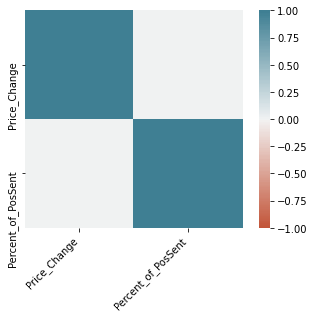

In [28]:
import seaborn as sns

corr = forplot[['Price_Change', 'Percent_of_PosSent']].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [29]:
forplot[['Price_Change', 'Percent_of_PosSent']].corr()

,Price_Change,Percent_of_PosSent
Price_Change,1.000000,0.001771
Percent_of_PosSent,0.001771,1.000000


In [30]:
to_roll_list = [' Close', 'Price_Change','Mean_Score', 'Percent_of_PosSent']
roll_col = ['Close_roll', 'Price_Change_roll', 'Mean_Score_roll', 'Percent_of_PosSent_roll']

for i in range(len(to_roll_list)):
    forplot[roll_col[i]] = forplot[to_roll_list[i]].rolling(6, min_periods=1).mean()

In [31]:
forplot[['Price_Change', 'Percent_of_PosSent_roll']].corr()

,Price_Change,Percent_of_PosSent_roll
Price_Change,1.000000,0.020952
Percent_of_PosSent_roll,0.020952,1.000000


In [32]:
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=3)
forplot['forward_roll']=forplot['Percent_of_PosSent'].rolling(window=indexer, min_periods=1).mean()
forplot[['Price_Change', 'forward_roll']].corr()

,Price_Change,forward_roll
Price_Change,1.000000,0.015694
forward_roll,0.015694,1.000000


In [33]:
forplot[['Price_Change', 'forward_roll']].corr().iloc[0,1]

0.01569426751072722

In [34]:
for i in range(1,20):
    forplot['Percent_of_PosSent_roll']=forplot['Percent_of_PosSent'].rolling(i, min_periods=1).mean()
    back = forplot[['Price_Change', 'Percent_of_PosSent_roll']].corr().iloc[0,1]
    print(i-1, back)

0 0.0017706250782653042
1 0.009391830794538631
2 0.0028408740286443414
3 0.0023986688144100395
4 0.016868758642987064
5 0.020952240014492605
6 0.032627461175718554
7 0.04365428382371587
8 0.04760955354109828
9 0.0559434598360575
10 0.05932880261623768
11 0.062047107585735894
12 0.06482848774947231
13 0.06380009294781874
14 0.0653403452611878
15 0.06862693728506793
16 0.0698330530305916
17 0.07573802829050048
18 0.08077247232512384


In [35]:
for i in range(1,20):
    indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=i)
    forplot['forward_roll']= forplot['Percent_of_PosSent'].rolling(window=indexer, min_periods=1).mean()
    forward = forplot[['Price_Change', 'forward_roll']].corr().iloc[0,1]
    print(i-1, forward)
    

0 0.001770625078265293
1 0.00738648650706109
2 0.01569426751072722
3 0.03150240161252717
4 0.03364885843730555
5 0.034874363869559395
6 0.0359919892329242
7 0.0358828744992173
8 0.043611806483113705
9 0.043758065918270854
10 0.04229323542013852
11 0.04265548006169827
12 0.04646291166280864
13 0.04969482964832453
14 0.05040439962769774
15 0.04857100158805995
16 0.05113770956067909
17 0.05342619656787207
18 0.05097804096919135


# Feature Engineering for SVM and KNN tuning

In [36]:
FE_df = forplot.drop(columns=[' Open', ' High', ' Low', 'forward_roll', 
                         'Close_roll', 'Price_Change_roll', 'Percent_of_PosSent_roll'])

In [37]:
FE_df

,Date,Close,Volume,Price_Change,Mean_Score,Percent_of_PosSent,Mean_Score_roll
0,2019-01-02,94.00,921050,0.000000,-0.5,0.0,-0.5
1,2019-01-03,95.00,1956650,0.010638,-0.5,0.0,-0.5
2,2019-01-04,93.50,2918340,-0.011105,-0.5,0.0,-0.5
3,2019-01-07,93.00,2523390,-0.010638,-0.5,0.0,-0.5
4,2019-01-08,91.80,1463860,-0.030623,-0.5,0.0,-0.5
...,...,...,...,...,...,...,...
617,2021-07-16,86.50,1780990,0.017647,0.0,0.0,0.0
618,2021-07-19,86.05,1326210,-0.006924,0.0,0.0,0.0
619,2021-07-21,84.30,928280,-0.022042,0.0,0.0,0.0
620,2021-07-22,87.50,948370,0.034891,0.0,0.0,0.0


In [38]:
FE_df['Stock_T5'] = FE_df[' Close'].shift(periods=-5).ffill()

In [39]:
FE_df[[' Close', 'Stock_T5']].head(10)

,Close,Stock_T5
0,94.0,93.0
1,95.0,94.5
2,93.5,90.0
3,93.0,91.9
4,91.8,93.8
5,93.0,94.5
6,94.5,93.0
7,90.0,93.1
8,91.9,92.0
9,93.8,92.8


In [40]:
move = [] 
for i in range(len(FE_df)):
    GL = (FE_df['Stock_T5'][i]-FE_df[' Close'][i])/FE_df['Stock_T5'][i]
    if GL > 0.01:
        move.append('Up')
    elif GL <= 0.01:
        move.append('Down')
    else:
        move.append('Stay')
        
FE_df['Movement'] = move

In [41]:
FE_df[['Date', ' Close', 'Stock_T5']][:10]

,Date,Close,Stock_T5
0,2019-01-02,94.0,93.0
1,2019-01-03,95.0,94.5
2,2019-01-04,93.5,90.0
3,2019-01-07,93.0,91.9
4,2019-01-08,91.8,93.8
5,2019-01-09,93.0,94.5
6,2019-01-10,94.5,93.0
7,2019-01-11,90.0,93.1
8,2019-01-14,91.9,92.0
9,2019-01-15,93.8,92.8


## Feature Engineering with PSEI prices 

In [42]:
PSEI_prices = pd.read_csv("HistoricalPrices.csv")

In [43]:
#Normalized Stock Price Change = stock_delta_price - psei_delta_price

In [44]:
PSEI_prices

,Date,Open,High,Low,Close
0,07/23/21,6600.88,6611.31,6461.75,6520.74
1,07/22/21,6496.97,6586.01,6496.97,6576.62
2,07/21/21,6611.67,6611.67,6451.12,6476.21
3,07/19/21,6665.54,6665.54,6510.43,6587.20
4,07/16/21,6743.78,6783.91,6653.53,6693.83
...,...,...,...,...,...
617,01/08/19,7820.26,7826.08,7702.12,7702.12
618,01/07/19,7800.88,7900.70,7787.66,7787.66
619,01/04/19,7657.18,7801.50,7657.18,7761.11
620,01/03/19,7507.48,7680.60,7490.28,7680.60


In [45]:
PSEI_prices['PSEI_T5'] = PSEI_prices[' Close'].shift(periods=-5).ffill()

In [46]:
PSEI_prices = PSEI_prices[['Date', ' Close', 'PSEI_T5']]
PSEI_prices.rename(columns={' Close': 'PSEI_Close'}, inplace=True)
PSEI_prices['Date'] = pd.to_datetime(PSEI_prices['Date'])

/Users/shawn/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/shawn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
PSEI_prices[PSEI_prices['Date']=='2019-11-06']

,Date,PSEI_Close,PSEI_T5
414,2019-11-06,8025.88,7991.19


In [48]:
FE_df = FE_df.merge(PSEI_prices, how='left', on='Date')

In [49]:
FE_df

,Date,Close,Volume,Price_Change,Mean_Score,Percent_of_PosSent,Mean_Score_roll,Stock_T5,Movement,PSEI_Close,PSEI_T5
0,2019-01-02,94.00,921050,0.000000,-0.5,0.0,-0.5,93.0,Down,7489.20,7489.20
1,2019-01-03,95.00,1956650,0.010638,-0.5,0.0,-0.5,94.5,Down,7680.60,7489.20
2,2019-01-04,93.50,2918340,-0.011105,-0.5,0.0,-0.5,90.0,Down,7761.11,7489.20
3,2019-01-07,93.00,2523390,-0.010638,-0.5,0.0,-0.5,91.9,Down,7787.66,7489.20
4,2019-01-08,91.80,1463860,-0.030623,-0.5,0.0,-0.5,93.8,Up,7702.12,7489.20
...,...,...,...,...,...,...,...,...,...,...,...
617,2021-07-16,86.50,1780990,0.017647,0.0,0.0,0.0,86.5,Down,6693.83,6834.92
618,2021-07-19,86.05,1326210,-0.006924,0.0,0.0,0.0,86.5,Down,6587.20,6913.87
619,2021-07-21,84.30,928280,-0.022042,0.0,0.0,0.0,86.5,Up,6476.21,6795.13
620,2021-07-22,87.50,948370,0.034891,0.0,0.0,0.0,86.5,Down,6576.62,6835.41


In [50]:
normalized_move = []
normalized_change = []

for i in range(len(FE_df)):
    GL_Stock = (FE_df['Stock_T5'][i]-FE_df[' Close'][i])/FE_df['Stock_T5'][i]
    GL_PSEI = (FE_df['PSEI_T5'][i]-FE_df['PSEI_Close'][i])/FE_df['PSEI_T5'][i]
    
    normalized = GL_Stock - GL_PSEI
    normalized_change.append(normalized)
    
    if normalized > 0.01:
        normalized_move.append('Up')
    elif normalized <= 0.01:
        normalized_move.append('Down')
    else:
        normalized_move.append('Stay')
        
FE_df['Normalized_Change'] = normalized_change        
FE_df['Normalized_Movement'] = normalized_move

In [51]:
FE_df

,Date,Close,Volume,Price_Change,Mean_Score,Percent_of_PosSent,Mean_Score_roll,Stock_T5,Movement,PSEI_Close,PSEI_T5,Normalized_Change,Normalized_Movement
0,2019-01-02,94.00,921050,0.000000,-0.5,0.0,-0.5,93.0,Down,7489.20,7489.20,-0.010753,Down
1,2019-01-03,95.00,1956650,0.010638,-0.5,0.0,-0.5,94.5,Down,7680.60,7489.20,0.020266,Up
2,2019-01-04,93.50,2918340,-0.011105,-0.5,0.0,-0.5,90.0,Down,7761.11,7489.20,-0.002582,Down
3,2019-01-07,93.00,2523390,-0.010638,-0.5,0.0,-0.5,91.9,Down,7787.66,7489.20,0.027883,Up
4,2019-01-08,91.80,1463860,-0.030623,-0.5,0.0,-0.5,93.8,Up,7702.12,7489.20,0.049752,Up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,2021-07-16,86.50,1780990,0.017647,0.0,0.0,0.0,86.5,Down,6693.83,6834.92,-0.020643,Down
618,2021-07-19,86.05,1326210,-0.006924,0.0,0.0,0.0,86.5,Down,6587.20,6913.87,-0.042046,Down
619,2021-07-21,84.30,928280,-0.022042,0.0,0.0,0.0,86.5,Up,6476.21,6795.13,-0.021500,Down
620,2021-07-22,87.50,948370,0.034891,0.0,0.0,0.0,86.5,Down,6576.62,6835.41,-0.049421,Down


In [52]:
#Normalize loudness
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
#also try Robust Scaler -> for substantial number of outliers
scaler = StandardScaler()

FE_df['Normalized_Close'] = scaler.fit_transform(FE_df[[' Close']])
FE_df['PSEI_Normalized_Close'] = scaler.fit_transform(FE_df[['PSEI_Close']])
FE_df['Normalized_Volume'] = scaler.fit_transform(FE_df[[' Volume']])

In [53]:
FE_df[FE_df['Normalized_Movement']=="Stay"]

,Date,Close,Volume,Price_Change,Mean_Score,Percent_of_PosSent,Mean_Score_roll,Stock_T5,Movement,PSEI_Close,PSEI_T5,Normalized_Change,Normalized_Movement,Normalized_Close,PSEI_Normalized_Close,Normalized_Volume


# Classification model (KNN and SVM)

### KNN

In [54]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score,roc_curve, auc, confusion_matrix, classification_report, precision_score, average_precision_score

In [55]:
def precsionCrossVal(X_train, Y_train, neighbors, cv=5):
    X_train = X_train.reset_index(drop=True)
    Y_train = Y_train.reset_index(drop=True)
    precision = []
    division = [x for x in range(0,len(Y_train), round(len(Y_train)/cv))]
    division.append(len(Y_train))
    elements = list(set(Y_train))
    for i in range(1,len(division)):
        try:
            tempXtest = X_train.iloc[division[i-1]:division[i]]
            tempYtest = Y_train.iloc[division[i-1]:division[i]]
            tempXtrain = X_train.drop(labels=range(division[i-1], division[i])).reset_index(drop=True)
            tempYtrain = Y_train.drop(labels=range(division[i-1], division[i])).reset_index(drop=True)
            Y_test_class = list(set(tempYtest))
            print(Y_test_class)
            knn = KNeighborsClassifier(n_neighbors=neighbors)
            knn.fit(tempXtrain, tempYtrain)
            tempPrecision = classification_report(tempYtest,knn.predict(tempXtest)).split('\n')[5+len(Y_test_class)].split('    ')[1].replace(' ', "")
            precision.append(float(tempPrecision))
        except:
            print("err")
            precision.append(0)
    return precision
        
        
    

In [56]:
# create feature matrix (X)
feature_cols = ['Normalized_Close', 'Mean_Score', 'PSEI_Normalized_Close', 'Percent_of_PosSent']
X = FE_df[feature_cols]
y = FE_df['Normalized_Movement']

# creating training set, test set and checking shapes 
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print("Shape of X_Train:"+str(X_train.shape))
print("Shape of y_Train:"+str(Y_train.shape))
print("Shape of X_Test:"+str(X_test.shape))
print("Shape of y_Test:"+str(Y_test.shape))

Shape of X_Train:(497, 4)
Shape of y_Train:(497,)
Shape of X_Test:(125, 4)
Shape of y_Test:(125,)


In [57]:
cv_scores = []
neighbors = np.arange(2,51)

for k in neighbors:
    print('Fitting for k=%d' % k)
    scores = precsionCrossVal(X_train, Y_train, k, cv=5)
    cv_scores.append(sum(scores)/len(scores))

Fitting for k=2
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=3
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']


/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/skle

['Up']
Fitting for k=4
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=5
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']
['Down', 'Up']


/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/skle

['Down', 'Up']
['Up']
Fitting for k=6
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=7
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']


/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/si

['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=8
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=9
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']


/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/si

['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=10
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=11
['Down', 'Up']
['Up', 'Down']

/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/si


['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=12
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=13
['Down', 'Up']


/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/si

['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=14
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=15
['Down', 'Up']


/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packa

['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=16
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=17
['Down', 'Up']


/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/si

['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=18
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=19
['Down', 'Up']


/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/si

['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=20
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=21
['Down', 'Up']
['Up', 'Down']


/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packa

['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=22
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=23
['Down', 'Up']
['Up', 'Down']


/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/si

['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=24
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=25
['Down', 'Up']


/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/si

['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=26
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=27
['Down', 'Up']


/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/skle

['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=28
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=29
['Down', 'Up']


/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/skle

['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=30
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=31
['Down', 'Up']


/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/si

['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=32
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=33
['Down', 'Up']


/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/si

['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=34
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']


/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/pyth

Fitting for k=35
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=36
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']


/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/si

Fitting for k=37
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=38
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']


/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/si

['Up']
Fitting for k=39
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=40
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']


/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/si

Fitting for k=41
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=42
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']


/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/pyth

['Up']
Fitting for k=43
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=44
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']


/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/pyth

['Up']
Fitting for k=45
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=46
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=47
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=48
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']
['Down', 'Up']

/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/pyth


['Down', 'Up']
['Up']
Fitting for k=49
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']
['Down', 'Up']
['Down', 'Up']
['Up']
Fitting for k=50
['Down', 'Up']
['Up', 'Down']
['Down', 'Up']
['Down', 'Up']


/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/pyth

['Down', 'Up']
['Up']


/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/anaconda3/lib/pyth

The optimal number of neighbors is 2


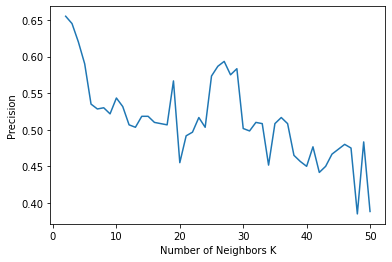

In [58]:
# determining best k
optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, cv_scores)
plt.xlabel("Number of Neighbors K")

plt.ylabel("Precision")
plt.show()

In [59]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_train, Y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(Y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 2 is 64.800000%


In [60]:
knn_optimal = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn_optimal.fit(X_train, Y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(Y_test, pred) * 100
#print('\nThe accuracy of the knn classifier for k = %d is %f%%' % ('5', acc))

(array([97.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 28.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

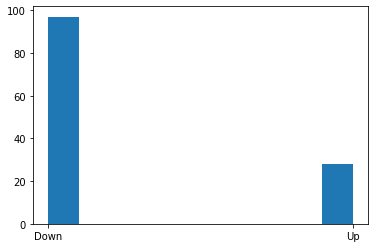

In [61]:
plt.hist(knn_optimal.predict(X_test))

(array([80.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 45.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

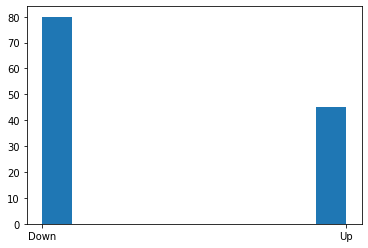

In [62]:
plt.hist(Y_test)

In [63]:
print(confusion_matrix(Y_test,knn_optimal.predict(X_test)))

[[69 11]
 [28 17]]


### Out of Sample

In [64]:
print(classification_report(Y_test,knn_optimal.predict(X_test)))

              precision    recall  f1-score   support

        Down       0.71      0.86      0.78        80
          Up       0.61      0.38      0.47        45

    accuracy                           0.69       125
   macro avg       0.66      0.62      0.62       125
weighted avg       0.67      0.69      0.67       125



### All Data

In [65]:
print(classification_report(y,knn_optimal.predict(X)))

              precision    recall  f1-score   support

        Down       0.79      0.87      0.83       391
          Up       0.74      0.61      0.67       231

    accuracy                           0.77       622
   macro avg       0.77      0.74      0.75       622
weighted avg       0.77      0.77      0.77       622



### Only Sample

In [66]:
print(classification_report(Y_train,knn_optimal.predict(X_train)))

              precision    recall  f1-score   support

        Down       0.81      0.88      0.84       311
          Up       0.76      0.66      0.71       186

    accuracy                           0.80       497
   macro avg       0.79      0.77      0.78       497
weighted avg       0.79      0.80      0.79       497

